# Global Power Plant Database

## Problem Statement

### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Keyattributes

The database includes the following indicators:

- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the source field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_data_source (text): attribution for the reported generation information
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

### Fuel type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

### Prediction:

Make two prediction for labels 1) primary_fuel
2) capacity_mw

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('global_power_plant.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Used this just to have a look at the data

In [8]:
df.shape

(908, 25)

This shows that the code has 908 rows and 25 columns

In [9]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We can see here that this datset has object, float values

In [10]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Used this to see what we are working with

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

This gives complete information about the dataset

In [12]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

As we can see there are many null values in this dataset and we need to remove those columns

In [13]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

Dropiing all the columns which have more than 50% of the missing data beacuse it does not make any sense and our model will be biased.

In [14]:
df.shape

(908, 13)

The number of columns have been decreased from 25 to 13

In [15]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
commissioning_year,73
source,191


In [16]:
df.drop(["country","country_long","name","gppd_idnr","year_of_capacity_data","url"],axis=1,inplace=True)

In [17]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI
904,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About
905,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI
906,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI


In [18]:
df.shape

(908, 7)

So here we have removed the most of the data which was irrelevant for building our model.

In [19]:
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

So still we have missing data in our dataset. We are gonna remove it by mean and mode after splitting it into categorical and numerical columns.

In [20]:
#getting list of object data type column name
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


In [21]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

Filled the null values in the continuous data column with its mean and the null values of categorical data column with its mode.

In [22]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

As we can see now there are no more null values in our dataset.

# Data Visualization

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


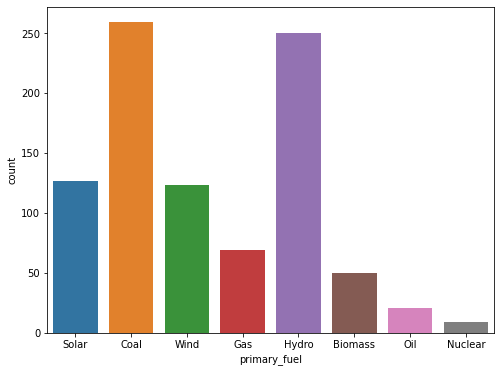

In [23]:
# Visualizing  the types of fuel in primary_fuel
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['primary_fuel'])
plt.show()

In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

However when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly.

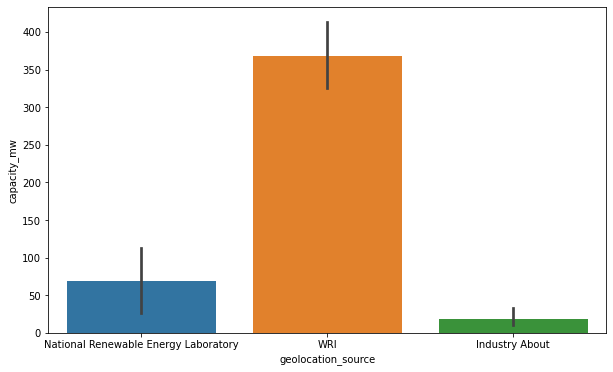

In [24]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more than 350 mega watts. The geolocation source industry about has less capacity

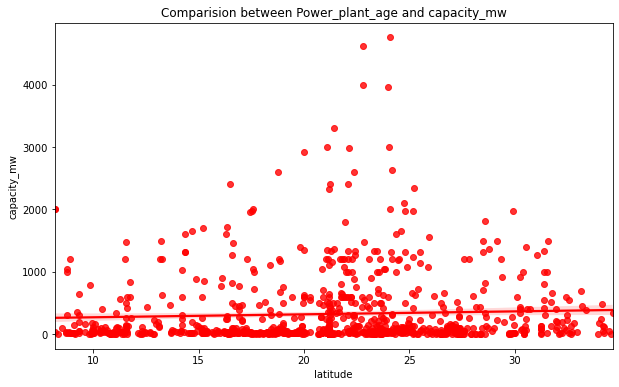

In [25]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['latitude'],df['capacity_mw'],color = 'r');

The plot shows that there is no linear relation between latitude and capacity of the power plant . We can notice the capacity of power plant is very less in this case also we can see some outliers present hear.

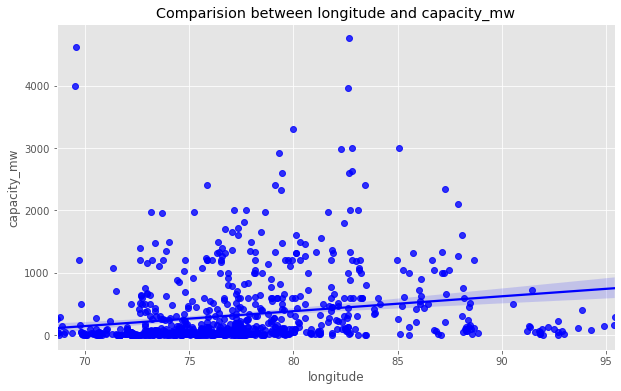

In [26]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df['capacity_mw'],color='b');

There is very weak linear relation between longitude and capacity. Here the longitude ranges from 74-82 has more capacity upto 2000. And we can also observe the presence of outliers.

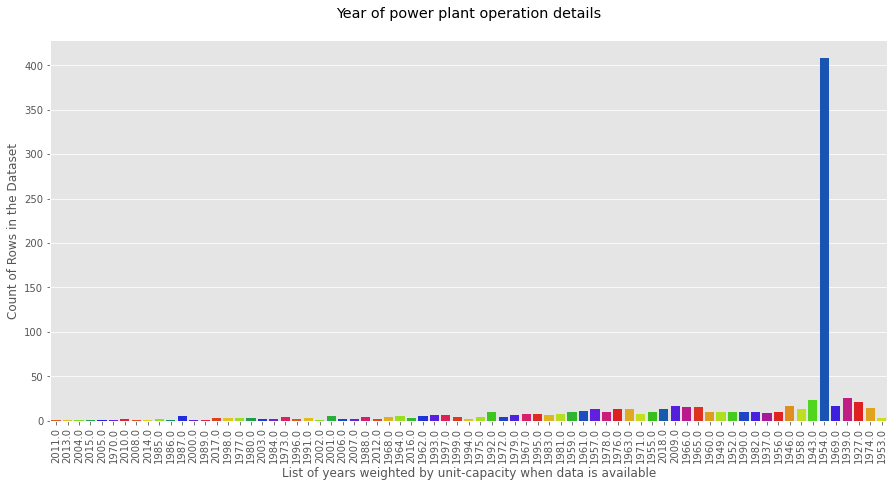

In [27]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1954 covered the most rows in our dataset compared to all the other years.

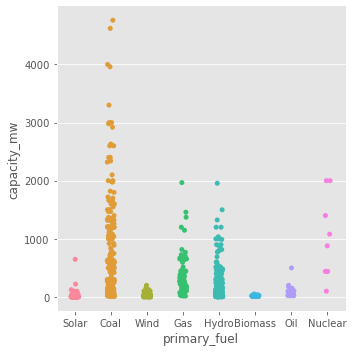

In [28]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()


In this plot we can see that the coal is the highest contributor when it comes to generating electricity and biomass is the least.

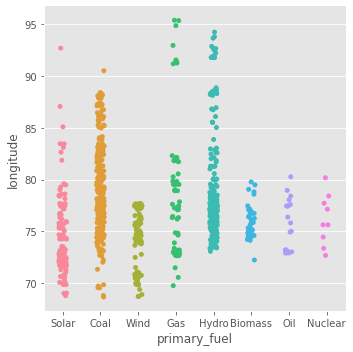

In [29]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

In the above plot we can see that longitude wise decimal degrees have quite a splitting data between coal and hydro .

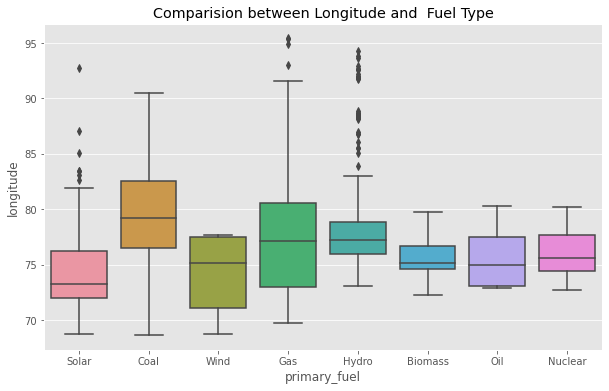

In [30]:
plt.figure(figsize = [10,6])
plt.style.use('ggplot')
plt.title("Comparision between Longitude and  Fuel Type")
sns.boxplot(df['primary_fuel'],df['longitude']);

As we can see in the above plot. There are outliers present in some of the columns.

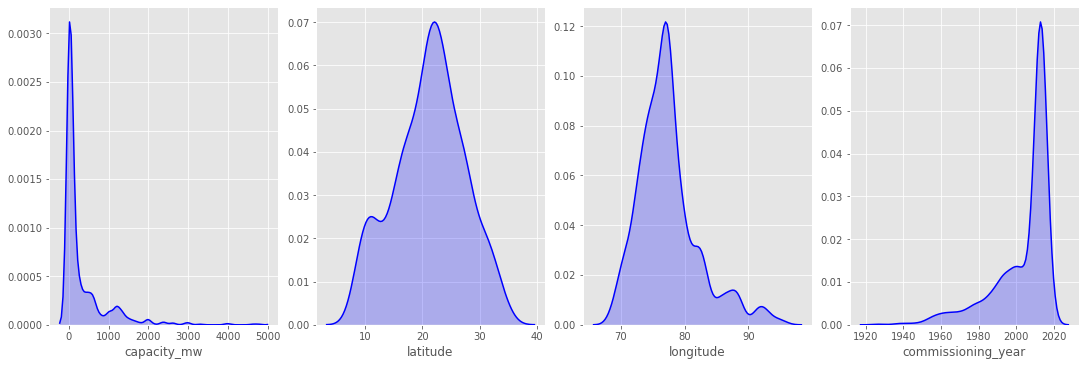

In [31]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

As we can see there is skewness present which needs to be removed before the model building.

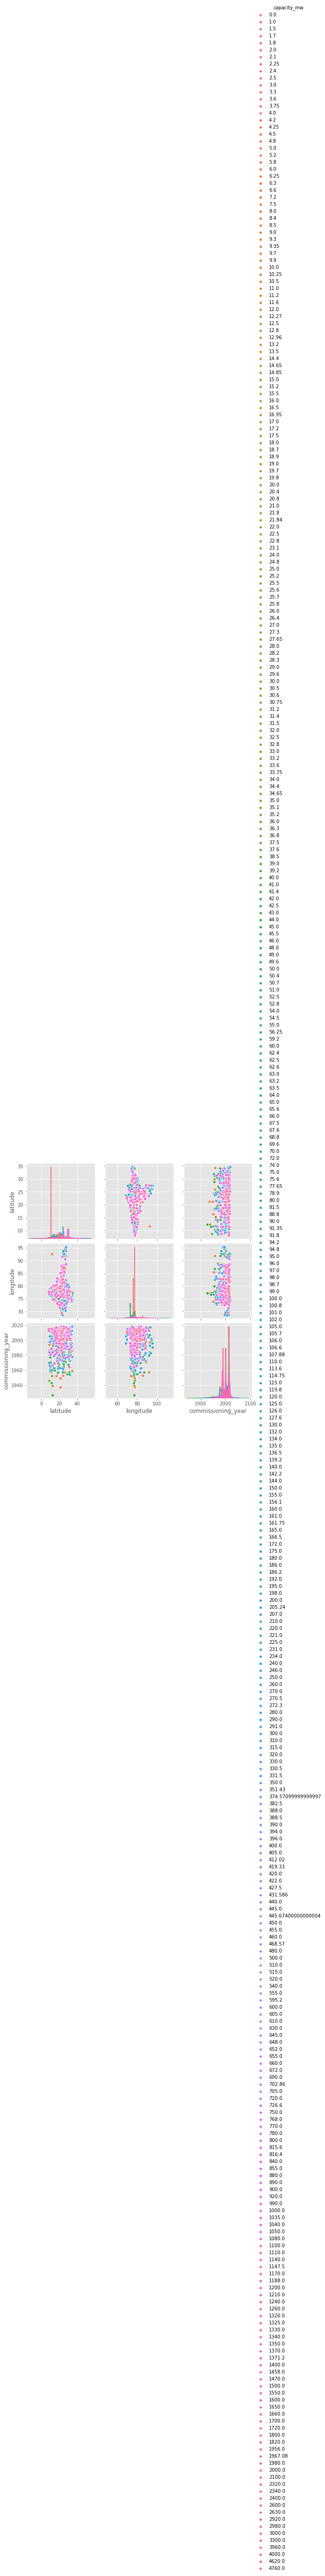

In [32]:
sns.pairplot(df,hue='capacity_mw',palette='husl')

## Encoding all the object data type

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


 Label encoded is usedd to convert target column which is object datatype to numerical data type.

In [34]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


Ordinal encoder is used to convert categorical column which is object data type to numerical data type.

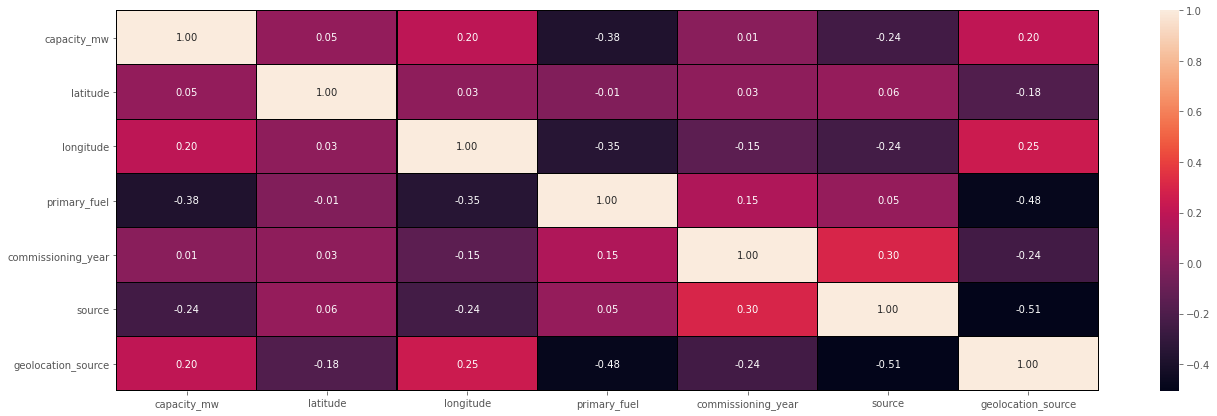

In [35]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

As we can see in the heatmap that our that our target lables "capacity_mw" and "primary_fuel" has both positive and negative correaltions with the remaining feature columns.

## Removing Outliers

In [36]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 7)
Shape of the dataframe after removing outliers:  (839, 7)
Percentage of data loss post outlier removal:  7.599118942731277


With the help of Z score method outliers are removes and the loss of data is 7% which is acceptable

In [37]:
df.skew()

capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -1.578180
source                1.794155
geolocation_source   -2.114267
dtype: float64

Some of the columns in the above data are skewed and which needs to be treated. The range of skewness is +/- 0.5.

In [38]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

Here we have removed the skewness with the log transform method

## Seperating the features and label variables into X and Y

In [39]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.645553,1.154079,-0.911736,0.468797,1.580000,-1.060641
1,0.180604,0.598056,-0.567417,0.618009,3.127148,0.400570
2,-0.311812,0.132345,-1.920402,0.618009,-0.514600,0.400570
3,0.354095,0.452429,3.205575,-0.053442,-0.490798,0.400570
4,1.765605,0.141538,1.283666,0.767220,-0.490798,0.400570


### Finding the best random state for classification models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 80.0 on Random State 336


The best random state we got from thr model is 388

### Machine Learning Model with classification

In [43]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

### Logistic Reegression

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        15
           1       0.53      0.78      0.63        50
           2       0.00      0.00      0.00        14
           3       0.77      0.67      0.72        55
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       1.00      0.91      0.95        33
           7       0.80      1.00      0.89        36

    accuracy                           0.71       210
   macro avg       0.46      0.49      0.47       210
weighted avg       0.66      0.71      0.68       210

Accuracy Score: 71.42857142857143
Cross Validation Score: 72.11006558311948

Accuracy Score - Cross Validation Score is -0.681494154548048


Created the Logistic Regression Model and checked it with evaluation matrix

### Support Vector Classifier

In [46]:
from sklearn.svm import SVC
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53        15
           1       0.66      0.86      0.75        50
           2       0.50      0.07      0.12        14
           3       0.85      0.85      0.85        55
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       1.00      0.91      0.95        33
           7       0.84      1.00      0.91        36

    accuracy                           0.79       210
   macro avg       0.55      0.53      0.52       210
weighted avg       0.75      0.79      0.75       210

Accuracy Score: 78.57142857142857
Cross Validation Score: 76.16481323068149

Accuracy Score - Cross Validation Score is 2.4066153407470807


### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.65      0.68      0.67        50
           2       0.38      0.71      0.50        14
           3       0.89      0.76      0.82        55
           4       0.00      0.00      0.00         1
           5       0.25      0.17      0.20         6
           6       1.00      0.91      0.95        33
           7       1.00      1.00      1.00        36

    accuracy                           0.78       210
   macro avg       0.61      0.61      0.60       210
weighted avg       0.80      0.78      0.78       210

Accuracy Score: 77.61904761904762
Cross Validation Score: 78.6676646706587

Accuracy Score - Cross Validation Score is -1.0486170516110747


### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.72      0.86      0.78        50
           2       0.60      0.64      0.62        14
           3       0.89      0.91      0.90        55
           4       0.00      0.00      0.00         1
           5       1.00      0.17      0.29         6
           6       1.00      0.94      0.97        33
           7       1.00      1.00      1.00        36

    accuracy                           0.86       210
   macro avg       0.76      0.65      0.67       210
weighted avg       0.87      0.86      0.85       210

Accuracy Score: 85.71428571428571
Cross Validation Score: 84.02908468776731

Accuracy Score - Cross Validation Score is 1.6852010265183992


### Extra Trees Classifier

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.73      0.82      0.77        50
           2       0.56      0.64      0.60        14
           3       0.89      0.89      0.89        55
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.98        33
           7       0.97      1.00      0.99        36

    accuracy                           0.84       210
   macro avg       0.62      0.62      0.62       210
weighted avg       0.82      0.84      0.83       210

Accuracy Score: 84.28571428571429
Cross Validation Score: 83.55289421157683

Accuracy Score - Cross Validation Score is 0.7328200741374644


### K Neighbors Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52        15
           1       0.67      0.80      0.73        50
           2       0.44      0.29      0.35        14
           3       0.88      0.78      0.83        55
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       1.00      0.91      0.95        33
           7       0.78      1.00      0.88        36

    accuracy                           0.77       210
   macro avg       0.53      0.54      0.53       210
weighted avg       0.75      0.77      0.75       210

Accuracy Score: 76.66666666666667
Cross Validation Score: 75.32862845737097

Accuracy Score - Cross Validation Score is 1.3380382092957035


## Hyper Parameter Tuning

In [58]:
# choosing Decision Tree Classifier
parameters = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50],
    'criterion': ["gini", "entropy"]
}

After comparing all the classification models I have selected Decision Tree Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. The reason behind selecting Decision Tree Classifier is because it got the highest accuracy score plus the cross validation score was even better for this model.

In [59]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best classification model.

In [61]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [62]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [64]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=5)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 75.23809523809524


The best accuracy for the model is 75.23%

In [65]:
import joblib
filename = "GlobalPowerPlant.pkl"
joblib.dump(Final_Model, filename)

['GlobalPowerPlant.pkl']

## Buliding the model for Target Variable "capacity_mw"

### Splitting the dataset into X and Y

In [66]:
X = df.drop('capacity_mw', axis=1)
Y = df['capacity_mw']

I have separated the dataset into features and regression label where X represents all the feature columns and Y represents the regression target label column.

## Feature Scaling

In [67]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.154079,-0.911736,1.175163,0.468797,1.580000,-1.060641
1,0.598056,-0.567417,-0.983247,0.618009,3.127148,0.400570
2,0.132345,-1.920402,1.606845,0.618009,-0.514600,0.400570
3,0.452429,3.205575,-0.551565,-0.053442,-0.490798,0.400570
4,0.141538,1.283666,-0.983247,0.767220,-0.490798,0.400570


I am using the Standard Scaler method to normalize my feature values and ensure that my regression model does not have any kind of biasness towards a particular column value.

## Finding the best Random State for Regression

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
        
print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.538334072004571 on Random State 135


In [70]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=135)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

### Linear Regression Model

In [71]:
from sklearn.metrics import mean_squared_error
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.2755006251261407
R2 Score is: 53.833407200457096
Cross Validation Score: 42.231770897477126
R2 Score - Cross Validation Score is 11.60163630297997


#### Ridge Regressor

In [72]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 1.275499938378957
R2 Score is: 53.83345691390831
Cross Validation Score: 42.25804411938349
R2 Score - Cross Validation Score is 11.575412794524816


#### Lasso Regressor

In [73]:
model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 1.4028822860149068
R2 Score is: 44.151831516467034
Cross Validation Score: 37.52199723471622
R2 Score - Cross Validation Score is 6.629834281750817


#### Support Vector Regressor

In [74]:
from sklearn.svm import SVR
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1.1644556142667228
R2 Score is: 61.52201239071935
Cross Validation Score: 47.635622859038264
R2 Score - Cross Validation Score is 13.886389531681083


#### Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion="mse", random_state=111)
reg(model, X, Y)

RMSE Score is: 1.2652083727083245
R2 Score is: 54.57545490607103
Cross Validation Score: 36.42529268510492
R2 Score - Cross Validation Score is 18.15016222096611


#### Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1.2385803301234843
R2 Score is: 56.467377617071946
Cross Validation Score: 46.05240530096303
R2 Score - Cross Validation Score is 10.414972316108916


#### Gradient Boosting Regressor

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.565822031741349
R2 Score is: 30.425311409252622
Cross Validation Score: 4.683954920102955
R2 Score - Cross Validation Score is 25.741356489149666


#### Ada Boost Regressor

In [77]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.1131522779037217
R2 Score is: 64.83783310530653
Cross Validation Score: 55.637601015967334
R2 Score - Cross Validation Score is 9.200232089339195


#### Extra Trees Regressor

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.0144801843881748
R2 Score is: 70.79524218284124
Cross Validation Score: 63.44611370122606
R2 Score - Cross Validation Score is 7.349128481615175


### Hyperparameter Tuning for Regression Model

#### Choosing Extra Trees Regressor

In [80]:
parameters = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

After comparing all the regression models I have selected Extra Trees Regressor as my best regression model and have listed down it's parameters above referring the sklearn webpage. I chose Extra Trees Regressor model becuase I feel among all the other regression models it was able to give me a better R2 score and a decent cross validation score for the same.

In [81]:
GSCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best regression model.

In [82]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [83]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 3,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 42}

The Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [84]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.63592075610242


## Saving the model

In [85]:
filename = "Global_Power_Plant_Regression.pkl"
joblib.dump(Final_Model, filename)

['Global_Power_Plant_Regression.pkl']